In [13]:
include("mfpt.jl")

compare_results (generic function with 1 method)

In [12]:
seed = 1234
tau = 0.25
h = 0.001
k = 1.0
m = 1.0
gamma = 2.0
limit = 0.0
nsteps = Int64(1e7)
nsims = 50
q0 = -1.0
p0 = 0.0
qt = copy(limit)
S0 = State(q=q0, p=p0, t=0.0)
C = Cache()
P = Params(seed=seed, tau=tau, h=h, k=k, m=m, gamma=gamma, limit=limit)

Params(0.001, 0.25, 2.0, 1234, 1.0, 1.0, 0.0)

In [4]:
P.h

0.001

In [14]:
# @time H = integrator_fix(S0, nsteps; PP=P, CC=C, ut=:baoab!);
@time HH = integrator_fix(S0, Int64(1e7); PP=P, CC=C, ut=:euler!, max_cross=100000);
plot_diagnostics(HH, P, subsample=10)

  2.062091 seconds (60.52 M allocations: 1.218 GiB, 22.44% gc time)
PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x15b16bb70>, PyObject <matplotlib.patches.Rectangle object at 0x15b16bb00>, PyObject <matplotlib.patches.Rectangle object at 0x1403abcf8>, PyObject <matplotlib.patches.Rectangle object at 0x1403ab978>, PyObject <matplotlib.patches.Rectangle object at 0x1403ab908>, PyObject <matplotlib.patches.Rectangle object at 0x1403ab5c0>, PyObject <matplotlib.patches.Rectangle object at 0x1403ab128>, PyObject <matplotlib.patches.Rectangle object at 0x140398e10>, PyObject <matplotlib.patches.Rectangle object at 0x169e16630>, PyObject <matplotlib.patches.Rectangle object at 0x169e16be0>, PyObject <matplotlib.patches.Rectangle object at 0x169e16a20>, PyObject <matplotlib.patches.Rectangle object at 0x169e169e8>, PyObject <matplotlib.patches.Rectangle object at 0x169e164e0>, PyObject <matplotlib.patches.Rectangle object at 0x15b0e6e10>, PyObject <matplotlib.patches.Recta

MethodError: MethodError: no method matching -(::Float64, ::Array{Float64,2})
Closest candidates are:
  -(::Float64, !Matched::Float64) at float.jl:397
  -(::Float64) at float.jl:387
  -(!Matched::PyCall.PyObject, ::Any) at /Users/jakeroth/.julia/packages/PyCall/0jMpb/src/pyoperators.jl:14
  ...

In [ ]:
median(HH.times)

In [ ]:
kk = kde(H.times)
plot(kk.x, kk.density)

In [ ]:
mean(HH.times)

In [ ]:
1.0 / mean(HH.times)

In [ ]:
P.gamma * tau * 1.0 / (2*pi) * exp(-(V(0.0, k) - V(-1.0, k))/tau)

In [ ]:
1.0 / (2*pi*P.gamma) * exp(-(V(0.0, k) - V(-1.0, k))/tau)

In [ ]:
1.0 / (2*pi) * exp(-(V(0.0, k) - V(-1.0, k))/tau)

In [ ]:
1.0 / mean(H.times)

In [ ]:
#P.h = 0.0001
#@time H = integrator_var(S0, 2; PP=P, CC=C, ut=:euler!);

In [ ]:
1/(0.035/0.025)

In [ ]:
P.h

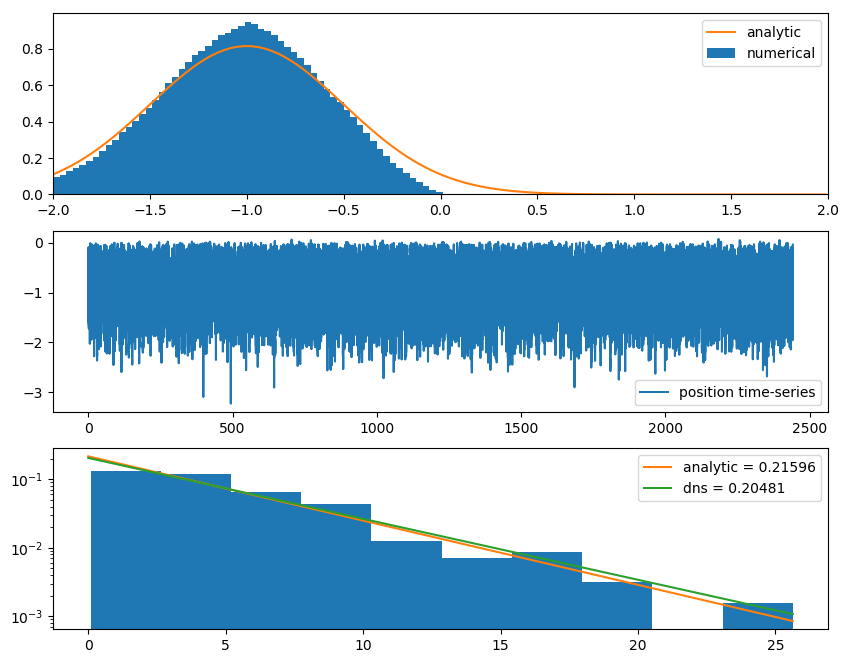

138.431483 seconds (42.43 M allocations: 150.920 GiB, 32.18% gc time)
PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x16f97f470>, PyObject <matplotlib.patches.Rectangle object at 0x16c037748>, PyObject <matplotlib.patches.Rectangle object at 0x16f97fa58>, PyObject <matplotlib.patches.Rectangle object at 0x16f97fda0>, PyObject <matplotlib.patches.Rectangle object at 0x16f97feb8>, PyObject <matplotlib.patches.Rectangle object at 0x16f9ae470>, PyObject <matplotlib.patches.Rectangle object at 0x16f9ae7b8>, PyObject <matplotlib.patches.Rectangle object at 0x16f9aeb00>, PyObject <matplotlib.patches.Rectangle object at 0x16f9aee48>, PyObject <matplotlib.patches.Rectangle object at 0x16f9aef60>, PyObject <matplotlib.patches.Rectangle object at 0x16f9b9518>, PyObject <matplotlib.patches.Rectangle object at 0x16f9b9860>, PyObject <matplotlib.patches.Rectangle object at 0x16f9b9ba8>, PyObject <matplotlib.patches.Rectangle object at 0x16f9b9ef0>, PyObject <matplotlib.patches.Rec

In [6]:
@time H = integrator_var(S0, 500; PP=P, CC=C, ut=:euler!);
plot_diagnostics(H, P, subsample=10)

In [ ]:
plot((0.5*HH.phist.^2 + 0.5*(HH.qhist .+ 1.0).^2)[1:10000:end])

In [ ]:
kk = kde(HH.times)
plot(kk.x, kk.density)

In [ ]:
hist(HH.times)

In [ ]:
P.gamma * exp(-abs(V(P.limit, P.k) - V(-1, P.k)) / P.tau) / (2.0 * pi * P.tau)

In [ ]:
kk.x

In [ ]:
kk = kde(H.times)
plot(kk.x, kk.density)

In [ ]:
lam = 1/mean(HH.times)

In [ ]:
hist(HH.times, bins=10, density=true)
yscale("log", nonposy="clip")
# x = collect(range(0, 3000, length=1000))
plot(x, lam .* exp.(-lam .* x))

In [ ]:
mean(H.times)

## long chain

> (a)

In [ ]:
P.gamma = 0.01
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hsa = Array{Hist}(undef, length(vars))
outsa = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler!, max_cross=Int64(1e5))
    out = compare_results(H, P; S0=S0)
    Hsa[i] = H
    outsa[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outsa[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outsa[i][:lam_ana]*(P.gamma^2/tau) for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outsa[i][:lam_dns] for i = 1:length(vars)]./[outsa[i][:lam_ana]*(P.gamma^2/tau) for i = 1:length(vars)], label="dns/analytic")
legend()

> (b)

In [9]:
P.gamma = 2.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12, 0.10, 0.08, 0.06]
vari = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hsb = Array{Hist}(undef, length(vars))
outsb = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler!, max_cross=Int64(1e6))
    out = compare_results(H, P; S0=S0)
    Hsb[i] = H
    outsb[i] = out
end

Statistics.var: 5.000e-01 ==================================================
  1.155284 seconds (32.39 M allocations: 807.649 MiB, 24.10% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 37098
DNS mean(time to cross) = (crosses / nsteps) / dt    : 3.710e+00

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 2.696e-01
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.718e+00
exit time ratio DNS/ANA                              : 9.916e-02

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 3.710e+00
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 4.151e-01
exit rate ratio DNS/ANA                              : 8.937e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 4.000e-01 ============================================

 10.806975 seconds (301.88 M allocations: 7.487 GiB, 6.26% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 44358
DNS mean(time to cross) = (crosses / nsteps) / dt    : 4.436e-01

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 2.254e+00
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 2.276e+01
exit time ratio DNS/ANA                              : 9.905e-02

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 4.436e-01
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 8.764e-02
exit rate ratio DNS/ANA                              : 5.061e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 1.500e-01 ==================================================
 12.648656 seconds (301.49 M allocations: 7.481 GiB, 6.37% gc time)
cros

 14.362044 seconds (300.06 M allocations: 7.459 GiB, 7.79% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 1959
DNS mean(time to cross) = (crosses / nsteps) / dt    : 1.959e-02

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 5.093e+01
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 5.180e+02
exit time ratio DNS/ANA                              : 9.831e-02

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 1.964e-02
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 5.446e-03
exit rate ratio DNS/ANA                              : 3.606e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Statistics.var: 6.000e-02 ==================================================
 14.096622 seconds (300.01 M allocations: 7.458 GiB, 8.08% gc time)
cross

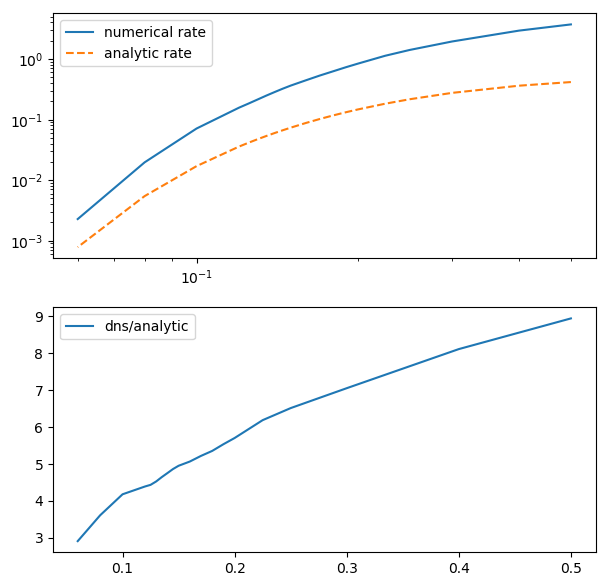

PyObject <matplotlib.legend.Legend object at 0x1604b04e0>

In [10]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outsb[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outsb[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outsb[i][:lam_dns] for i = 1:length(vars)]./[outsb[i][:lam_ana] for i = 1:length(vars)], label="dns/analytic")
legend()

> (c)

In [ ]:
P.gamma = 100.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hsc = Array{Hist}(undef, length(vars))
outsc = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler!, max_cross=Int64(1e5))
    out = compare_results(H, P; S0=S0)
    Hsc[i] = H
    outsc[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outsc[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outsc[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outsc[i][:lam_dns] for i = 1:length(vars)]./[outsc[i][:lam_ana] for i = 1:length(vars)], label="dns/analytic")
legend()

## until failure

> (a)

In [ ]:
P.gamma = 0.01
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Nfail = 100
HHsa = Array{Hist}(undef, length(vars))
ooutsa = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_var(S0, Nfail; PP=P, CC=C, ut=:euler!)
    out = compare_results(H, P; S0=S0)
    HHsa[i] = H
    ooutsa[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [ooutsa[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [ooutsa[i][:lam_ana]*(gamma) for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [ooutsa[i][:lam_dns] for i = 1:length(vars)]./[ooutsa[i][:lam_ana]*(gamma) for i = 1:length(vars)], label="numerical rate")
legend()

> (b)

In [ ]:
P.gamma = 2.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12, 0.10, 0.08, 0.06]
vari = :tau
Nfail = 100
HHsb = Array{Hist}(undef, length(vars))
ooutsb = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_var(S0, Nfail; PP=P, CC=C, ut=:euler!)
    out = compare_results(H, P; S0=S0)
    HHsb[i] = H
    ooutsb[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [ooutsb[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
# ax[:loglog](vars, [ooutsb[i][:lam_ana]*gamma for i = 1:length(vars)], label="analytic rate", linestyle="--")
ax[:loglog](vars, [ooutsb[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
# ax[:plot](vars, [ooutsb[i][:lam_dns] for i = 1:length(vars)]./[ooutsb[i][:lam_ana]*gamma for i = 1:length(vars)], label="numerical rate")
ax[:plot](vars, [ooutsb[i][:lam_dns] for i = 1:length(vars)]./[ooutsb[i][:lam_ana] for i = 1:length(vars)], label="numerical rate")
legend()

> (c)

In [ ]:
P.gamma = 100.0
vars = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
vari = :tau
Nfail = 100
HHsc = Array{Hist}(undef, length(vars))
ooutsc = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, vari, v)
    @time H = integrator_var(S0, Nfail; PP=P, CC=C, ut=:euler!)
    out = compare_results(H, P; S0=S0)
    HHsc[i] = H
    ooutsc[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [ooutsc[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [ooutsc[i][:lam_ana] for i = 1:length(vars)], label="analytic rate", linestyle="--")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [ooutsc[i][:lam_dns] for i = 1:length(vars)]./[ooutsc[i][:lam_ana] for i = 1:length(vars)], label="numerical rate")
legend()

In [ ]:
hist(Hsa[1].phist[Int.(round.(Hsa[1].times./h)).-200], bins=30)

## other...

In [ ]:
include("mfpt.jl")

In [ ]:
vars = [0.5, 0.4, 0.3, 0.25, 0.225]#, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12]
var = :tau
Ns = [1e7, 1e7, 1e7, 1e7, 1e7]#, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8, 1e8]
Hs = Array{Hist}(undef, length(vars))
outs = Array{Dict}(undef, length(vars))
for z in zip(vars, 1:length(vars))    
    v = z[1]
    i = z[2]
    printfmt("$(var): {:0.3e} ==================================================\n", v)
    setfield!(P, var, v)
    @time H = integrator_fix(S0, Int64(Ns[i]); PP=P, CC=C, ut=:euler2!, max_cross=Int64(1e7))
    out = compare_results(H, P; S0=S0)
    Hs[i] = H
    outs[i] = out
end

In [ ]:
fig = figure(figsize=(7,7))
ax = fig[:add_subplot](2,1,1)
ax[:loglog](vars, [outs[i][:lam_dns] for i = 1:length(vars)], label="numerical rate")
ax[:loglog](vars, [outs[i][:lam_ana] for i = 1:length(vars)], label="analytic rate")
legend()
ax = fig[:add_subplot](2,1,2)
ax[:plot](vars, [outs[i][:lam_dns] for i = 1:length(vars)]./[2.0*pi*outs[i][:lam_ana] for i = 1:length(vars)], label="numerical rate")
legend()

In [ ]:
plot(Hs[1].qhist[1:100000])

## discretization and noise

In [ ]:
a=-10
b=c=d=1
N = 100000

In [ ]:
sqrt(2.0*tau*h)*(noise==true)

In [ ]:
y0 = 0
v0 = 10
h = 0.001
tau = 0.01
Random.seed!(1234)
noise = true

y = copy(y0)
v = copy(v0)
ys = zeros(N)
for i = 1:N
    z = randn()*sqrt(2.0*tau*h)*(noise==true)
    y += v * h + z
    v += ((a*v^2) / (b*v + c*y + d)) * h
    ys[i] = y
end
plot(ys)

In [ ]:
sqrt(2.0*tau*h)*(noise==true)/h^(0.25)

In [ ]:
y0 = 0.0
y1 = 0.1
y2 = copy(y0)
h = 0.001
tau = 0.01
Random.seed!(1234)
noise = true

y2s = zeros(N)
for i = 1:N
    z = randn()*sqrt(2.0*tau*h)*(noise==true)
    y2 = 2*y1 - y0 + a*h*(y1-y0)^2 / (b*(y1-y0) + c*h*y1 + d*h) + z
    y0 = y1 + z
    y1 = y2 + 0
    y2s[i] = y2
end
plot(y2s)
plot(ys)

In [ ]:
y0 = 0
v0 = 10
h = 0.001
tau = 0.01
Random.seed!(1234)
noise = true

y = copy(y0)
v = copy(v0)
ys = zeros(N)
for i = 1:N
    z = randn()*sqrt(2.0*tau*h)*(noise==true)
    y += v * h 
    v += ((a*v^2) / (b*v + c*y + d)) * h + z
    ys[i] = y
end
# plot(y2s)
plot(ys)

In [ ]:
semilogy(y2s-ys)